In [51]:
####KNN
import numpy as np
class KNN(object):
    
    def createDataSet(self):
        group = np.array([[1.0,1.1], [1.0,1.0], [0,0], [0, 0.1]]) #np array only takes one list
        labels =['A', 'A', 'B','B']
        return group, labels


KNN =KNN()
group, labels=KNN.createDataSet()

In [52]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

## Plot the four data points of our very simple KNN example

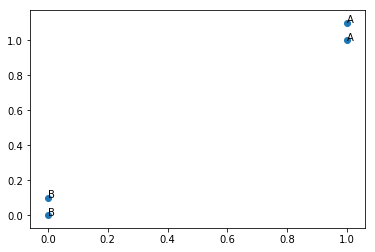

In [53]:
import matplotlib.pyplot as plt
plt.scatter([i[0] for i in group],[i[1] for i in group])
for i, xy in enumerate(labels):
    plt.annotate(xy, ([j[0] for j in group][i], [j[1] for j in group][i]))

## Pseedocode of KNN
### for every point in the dataset:
### calculate the distance between inX and and the current point
### sort the distances in increasing order
### take k items with lowest distances to inX
### find the majority class among these items
### return the majority class as our prediction for the class of inX

In [54]:
import operator
class KNN():
    def classify0(self, inX, dataSet, labels, k):
        ## calculate the distances
        dataSetSize =dataSet.shape[0]
        diffMat= np.tile(inX, (dataSetSize,1)) - dataSet
        sqDiffMat =diffMat **2
        sqDistances =sqDiffMat.sum(axis=1)
        distances = sqDistances ** 0.5
        sortedDistIndicies = distances.argsort()
        classCount= {}
        # voting the lowest k distance
        for i in range(k):
            voteIlabel = labels[sortedDistIndicies[i]]
            classCount[voteIlabel] =classCount.get(voteIlabel, 0) +1
        #sort the dictionary
        sortedClassCount =sorted(classCount.items(), key = operator.itemgetter(1), reverse =True) #python 3 change iteritems to items
        return sortedClassCount[0][0]
    

In [55]:
KNN= KNN()
KNN.classify0([0,0], group, labels, 3)

'B'

In [56]:
# another point
KNN.classify0([1.2,1.2], group, labels, 3)

'A'

## Another example: list 2.2


In [77]:
class KNN():
    def file_matrix(self,filename):
        fr= open(filename)
        #give number of lines in file
        numberOfLines= len(fr.readlines())
        #create numpy matrix to return
        returnMat = np.zeros((numberOfLines, 3))
        classLabelVector =[]
        fr= open(filename)
        index =0
        #parse line to a list
        for line in fr.readlines():
            line = line.strip()
            listFromLine = line.split('\t')
            returnMat[index, :] = listFromLine[0:3]
            classLabelVector.append(listFromLine[-1])
            index +=1
        return returnMat, classLabelVector

In [78]:
KNN= KNN()
datingDataMat, datingLabels= KNN.file_matrix('Datasets/datingTestSet.txt')

In [74]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [75]:
datingLabels[0:10]
lookup=  {'largeDoses':'red', 'smallDoses':'green', 'didntLike': 'blue'}

## Figure 2.4 Dating data with markers changed by class label

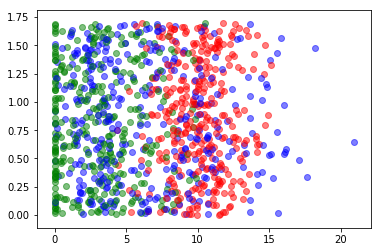

In [61]:
# Analyze with graph
for xy, color in zip(datingDataMat, datingLabels):
    plt.scatter(xy[1], xy[2],c = lookup[color], alpha =0.5)

plt.show()


## Normalize Data

In [81]:
class KNN():
    def autoNorm(dataSet):
        minVals= dataSet.min(0)
        maxVals = dataSet.max(0)
        ranges = maxVals - minVals
        normDataSet = np.zeros(dataSet.shape[0])
        m = dataSet.shape[0]
        normDataSet = dataSet - np.tile(minVals, (m,1))
        normDataSet = normDataSet /np.tile(ranges, (m,1))
        return normDataSet, ranges, minVals
    

In [63]:
normMat, ranges, minVals = KNN.autoNorm(datingDataMat)

In [64]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [65]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [66]:
minVals

array([0.      , 0.      , 0.001156])

## List 2.4  classifer testing code for the dating site

In [97]:

class KNN():
    def classify0(inX, dataSet, labels, k):
        ## calculate the distances
        dataSetSize =dataSet.shape[0]
        diffMat= np.tile(inX, (dataSetSize,1)) - dataSet
        sqDiffMat =diffMat **2
        sqDistances =sqDiffMat.sum(axis=1)
        distances = sqDistances ** 0.5
        sortedDistIndicies = distances.argsort()
        classCount= {}
        # voting the lowest k distance
        for i in range(k):
            voteIlabel = labels[sortedDistIndicies[i]]
            classCount[voteIlabel] =classCount.get(voteIlabel, 0) +1
        #sort the dictionary
        sortedClassCount =sorted(classCount.items(), key = operator.itemgetter(1), reverse =True) #python 3 change iteritems to items
        return sortedClassCount[0][0]
    
    def file_matrix(filename):
        fr= open(filename)
        #give number of lines in file
        numberOfLines= len(fr.readlines())
        #create numpy matrix to return
        returnMat = np.zeros((numberOfLines, 3))
        classLabelVector =[]
        fr= open(filename)
        index =0
        #parse line to a list
        for line in fr.readlines():
            line = line.strip()
            listFromLine = line.split('\t')
            returnMat[index, :] = listFromLine[0:3]
            classLabelVector.append(listFromLine[-1])
            index +=1
        return returnMat, classLabelVector
    def autoNorm(dataSet):
        minVals= dataSet.min(0)
        maxVals = dataSet.max(0)
        ranges = maxVals - minVals
        normDataSet = np.zeros(dataSet.shape[0])
        m = dataSet.shape[0]
        normDataSet = dataSet - np.tile(minVals, (m,1))
        normDataSet = normDataSet /np.tile(ranges, (m,1))
        return normDataSet, ranges, minVals
    
    hoRatio = 0.1
    datingDataMat, datingLabels = file_matrix('Datasets/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs= int(m *hoRatio)
    errorCount =0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print('the classifier came back with %s, the real answer is : %s' % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]) : 
            errorCount +=1
    
    print('the total error rate is: %f' % (errorCount /float(numTestVecs)))

the classifier came back with largeDoses, the real answer is : largeDoses
the classifier came back with smallDoses, the real answer is : smallDoses
the classifier came back with didntLike, the real answer is : didntLike
the classifier came back with didntLike, the real answer is : didntLike
the classifier came back with didntLike, the real answer is : didntLike
the classifier came back with didntLike, the real answer is : didntLike
the classifier came back with largeDoses, the real answer is : largeDoses
the classifier came back with largeDoses, the real answer is : largeDoses
the classifier came back with didntLike, the real answer is : didntLike
the classifier came back with largeDoses, the real answer is : largeDoses
the classifier came back with didntLike, the real answer is : didntLike
the classifier came back with didntLike, the real answer is : didntLike
the classifier came back with smallDoses, the real answer is : smallDoses
the classifier came back with didntLike, the real an